In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import sklearn
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import plot_confusion_matrix

In [5]:
dt=pd.read_csv('archive/creditcard.csv')

In [8]:
legit = dt[dt.Class == 0]
fraud =dt[dt.Class == 1]

In [9]:
legit_sample = legit.sample(n=20000)

In [12]:
df_fraud_oversampled = resample(fraud, 
                                 replace=True,   
                                 n_samples=5000 , 
                                 random_state=0)  

df_oversampled = pd.concat([df_fraud_oversampled, legit_sample])

In [13]:
df_oversampled.Class.value_counts()

0    20000
1     5000
Name: Class, dtype: int64

In [14]:
X = df_oversampled.drop(columns='Class', axis=1)
Y = df_oversampled['Class']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
model_tree = DecisionTreeClassifier(max_leaf_nodes=8, class_weight='balanced')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=8)

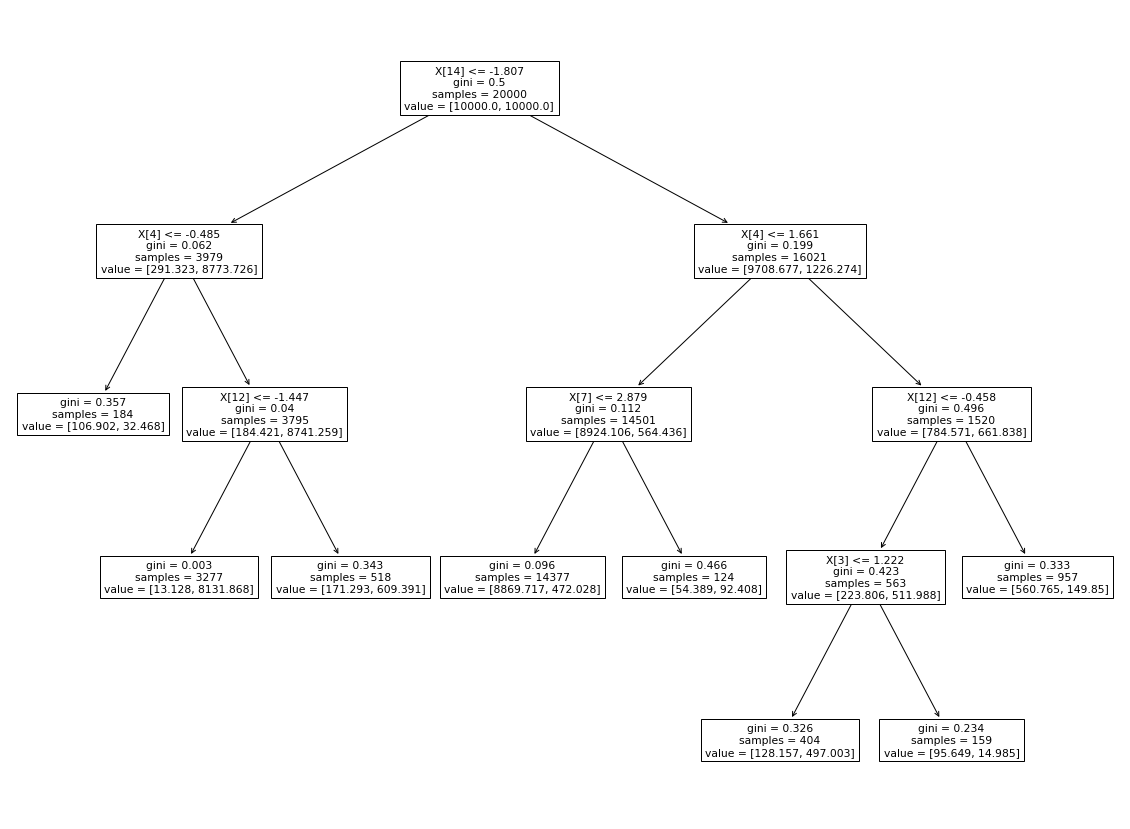

In [24]:
plt.figure(figsize=(20,15))
plot_tree(model_tree)
plt.show()

In [11]:
y_prediction=model_tree.predict(X_test)
# y_prediction

array([0, 0, 0, ..., 0, 1, 0])

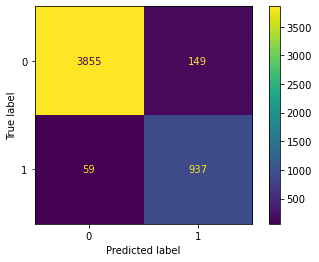

In [18]:
plot_confusion_matrix(model_tree,X_test,y_test)